In [56]:
# Starting Question: What can we learn from comparing Star Wars Characters' heights vs Star Wars Starships' lengths?

# Hopfully I can find out how many Yodas it would take to match the length of biggest starship on Star Wars.

In [57]:
# Import dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import math

In [58]:
# Map and requests APIs
url = "http://swapi.dev/api/"
url_response = requests.get(url).json()

url_people = f"{url}people/" 
people_response = requests.get(url_people).json()

url_starships = f"{url}starships/"
starships_response = requests.get(url_starships).json()

In [59]:
# Create lists for search results for characters
character = []
height = []

# Search requests for characters and appending them to the lists created
page = ["1", "2", "3", "4", "5", "6", "7", "8"]
url_Next_Character_Page = f"{url_people}?page="

print ("Searching Character Data...")

for x in page:
    Next_Character_Page = requests.get(url_Next_Character_Page + x).json()
   
    for person in Next_Character_Page["results"]:

        Character_Name = person["name"]
        character.append(Character_Name)

        Character_Height = person["height"]
        height.append(Character_Height)

        print (f"{Character_Name}'s stats have been added.")
    
print ("...Character Data Complete.")

Searching Character Data...
Luke Skywalker's stats have been added.
C-3PO's stats have been added.
R2-D2's stats have been added.
Darth Vader's stats have been added.
Leia Organa's stats have been added.
Owen Lars's stats have been added.
Beru Whitesun lars's stats have been added.
R5-D4's stats have been added.
Biggs Darklighter's stats have been added.
Obi-Wan Kenobi's stats have been added.
Anakin Skywalker's stats have been added.
Wilhuff Tarkin's stats have been added.
Chewbacca's stats have been added.
Han Solo's stats have been added.
Greedo's stats have been added.
Jabba Desilijic Tiure's stats have been added.
Wedge Antilles's stats have been added.
Jek Tono Porkins's stats have been added.
Yoda's stats have been added.
Palpatine's stats have been added.
Boba Fett's stats have been added.
IG-88's stats have been added.
Bossk's stats have been added.
Lando Calrissian's stats have been added.
Lobot's stats have been added.
Ackbar's stats have been added.
Mon Mothma's stats have 

In [60]:
# Put lists into a character dataframe
Character_Stat_df = pd.DataFrame({"Character Name": character,
                                  "Height (cm)": height})

Character_Stat_df

,Character Name,Height (cm)
0,Luke Skywalker,172
1,C-3PO,167
2,R2-D2,96
3,Darth Vader,202
4,Leia Organa,150
...,...,...
75,San Hill,191
76,Shaak Ti,178
77,Grievous,216
78,Tarfful,234


In [61]:
# Clean dataframes by dropping characters with unknown heights and changing Jabba's full name to his more well known name of Jabba the Hutt
Clean_Character_Stat_df = Character_Stat_df.drop(Character_Stat_df[Character_Stat_df["Height (cm)"] == "unknown"].index) 
Clean_Character_Stat_df["Character Name"].replace(regex = True, inplace = True, to_replace = "Jabba Desilijic Tiure", value = "Jabba the Hutt")

Clean_Character_Stat_df

,Character Name,Height (cm)
0,Luke Skywalker,172
1,C-3PO,167
2,R2-D2,96
3,Darth Vader,202
4,Leia Organa,150
...,...,...
75,San Hill,191
76,Shaak Ti,178
77,Grievous,216
78,Tarfful,234


In [62]:
# Deleted any unknown characters such as "," and changed height numbers from a string to number form
Clean_Character_Stat_df["Height (cm)"].replace(regex = True, inplace = True, to_replace = r"[^0-9.-]", value = r"")
Clean_Character_Stat_df["Height (cm)"] = Clean_Character_Stat_df["Height (cm)"].astype(float)

Character_Height_df = Clean_Character_Stat_df.sort_values("Height (cm)", ascending = True)
Character_Height_df = Character_Height_df.reset_index(drop = True)

Character_Height_df

,Character Name,Height (cm)
0,Yoda,66.0
1,Ratts Tyerel,79.0
2,Wicket Systri Warrick,88.0
3,Dud Bolt,94.0
4,R2-D2,96.0
...,...,...
74,Roos Tarpals,224.0
75,Chewbacca,228.0
76,Lama Su,229.0
77,Tarfful,234.0


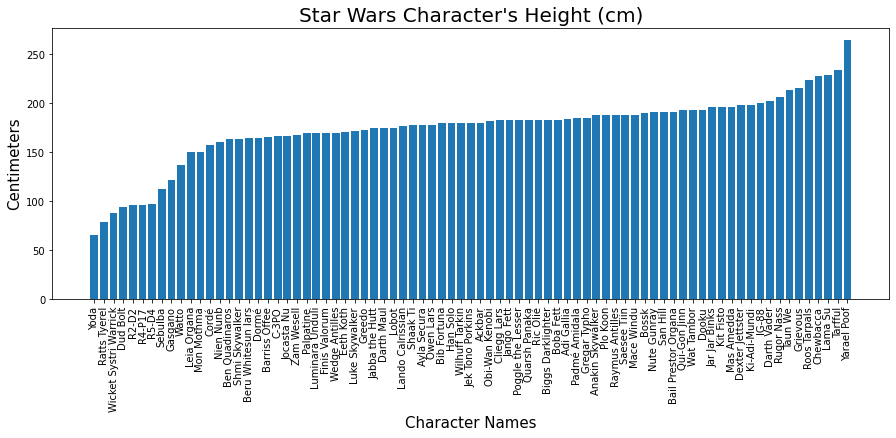

In [63]:
# Creating Bar Chart for Star Wars Characters Heights
Character = [value for value in Character_Height_df["Character Name"]]
Character_Label = Character_Height_df["Character Name"]

plt.figure(figsize = (15, 5))
plt.bar(Character_Height_df["Character Name"], Character_Height_df["Height (cm)"])
plt.xticks(Character, Character_Label, rotation = "vertical")
plt.title("Star Wars Character's Height (cm)", fontsize = 20)
plt.xlabel("Character Names", fontsize = 15)
plt.ylabel("Centimeters", fontsize= 15)
plt.savefig("Yoda_VS_Death_Star_Images_JC/Height_Bars_JC.png", bbox_inches = "tight")
plt.show()

In [64]:
# Create lists for search results for starships
Starship_Name = []
Starship_Length = []

# Search requests for starships and appending them to the lists created
page = ["1", "2", "3", "4"]
url_Next_Starships_Page = f"{url_starships}?page="

print ("Searching Starship Data...")

for x in page:
    find_ships_response = requests.get(url_Next_Starships_Page + x).json()
    
    for ships in find_ships_response["results"]:
        Ship_Name = ships["name"]
        Starship_Name.append(Ship_Name)

        Ship_Length = ships["length"]
        Starship_Length.append(Ship_Length)
        print (f"{Ship_Name}'s stats have been added.")

print ("...Starship Data Complete")

Searching Starship Data...
CR90 corvette's stats have been added.
Star Destroyer's stats have been added.
Sentinel-class landing craft's stats have been added.
Death Star's stats have been added.
Millennium Falcon's stats have been added.
Y-wing's stats have been added.
X-wing's stats have been added.
TIE Advanced x1's stats have been added.
Executor's stats have been added.
Rebel transport's stats have been added.
Slave 1's stats have been added.
Imperial shuttle's stats have been added.
EF76 Nebulon-B escort frigate's stats have been added.
Calamari Cruiser's stats have been added.
A-wing's stats have been added.
B-wing's stats have been added.
Republic Cruiser's stats have been added.
Droid control ship's stats have been added.
Naboo fighter's stats have been added.
Naboo Royal Starship's stats have been added.
Scimitar's stats have been added.
J-type diplomatic barge's stats have been added.
AA-9 Coruscant freighter's stats have been added.
Jedi starfighter's stats have been added.

In [65]:
# Put lists into a starship dataframe
Starship_df = pd.DataFrame({"Starship Name": Starship_Name, 
                            "Length (m)": Starship_Length})
Starship_df

,Starship Name,Length (m)
0,CR90 corvette,150
1,Star Destroyer,"1,600"
2,Sentinel-class landing craft,38
3,Death Star,120000
4,Millennium Falcon,34.37
5,Y-wing,14
6,X-wing,12.5
7,TIE Advanced x1,9.2
8,Executor,19000
9,Rebel transport,90


In [66]:
# Deleted any unknown characters such as "," and changed length numbers from a string to number form
Starship_df["Length (m)"].replace(regex = True, inplace = True, to_replace = r"[^0-9.-]", value = r"")
Starship_df["Length (m)"] = Starship_df["Length (m)"].astype(float)

Starship_Length_df = Starship_df.sort_values("Length (m)", ascending = True)
Starship_Length_df = Starship_Length_df.reset_index(drop = True)
Starship_Length_df

,Starship Name,Length (m)
0,Jedi Interceptor,5.47
1,Belbullab-22 starfighter,6.71
2,V-wing,7.90
3,Jedi starfighter,8.00
4,TIE Advanced x1,9.20
5,A-wing,9.60
6,Naboo fighter,11.00
7,X-wing,12.50
8,Y-wing,14.00
9,arc-170,14.50


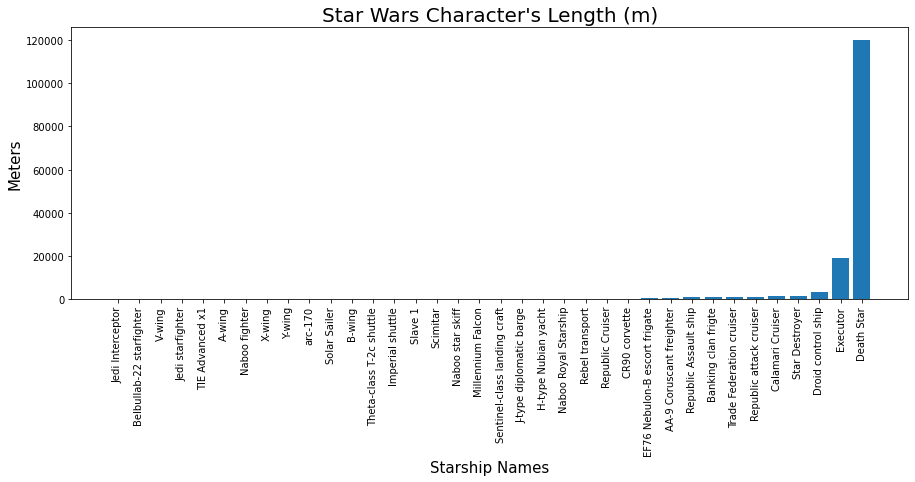

In [67]:
# Create a Bar Chart to show the order of the Starships Lengths
Starship = [value for value in Starship_Length_df["Starship Name"]]
Starship_Label = Starship_Length_df["Starship Name"]

plt.figure(figsize = (15, 5))
plt.bar(Starship_Length_df["Starship Name"], Starship_Length_df["Length (m)"])
plt.xticks(Starship, Starship_Label, rotation = "vertical")
plt.title("Star Wars Character's Length (m)", fontsize = 20)
plt.xlabel("Starship Names", fontsize = 15)
plt.ylabel("Meters", fontsize= 15)
plt.savefig("Yoda_VS_Death_Star_Images_JC/Length_Bars_JC.png", bbox_inches = "tight")
plt.show()

In [68]:
# Split ships up into different categories because of how wide of a variety 
Ships_Under_100m_df = Starship_Length_df[0 : 23]
Ships_Between_100m_and_1000m_df = Starship_Length_df[23 : 29]
Ships_Between_1000m_and_10000m_df = Starship_Length_df[29 : 34]
Ships_Over_10000m_df = Starship_Length_df[34 : ]

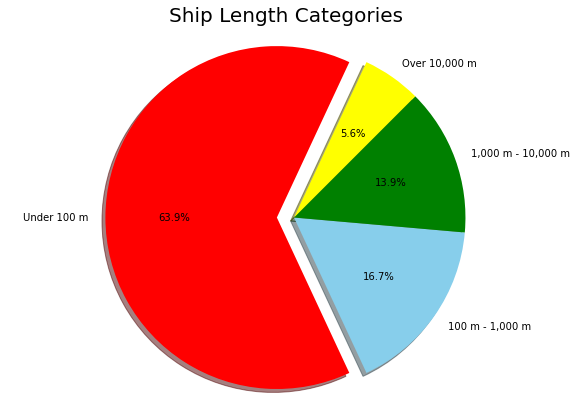

In [69]:
# Count ships per category
Count_Ships_Under_100m = Ships_Under_100m_df["Starship Name"].count()
Count_Ships_Between_100m_and_1000m_df = Ships_Between_100m_and_1000m_df["Starship Name"].count()
Count_Ships_Between_1000m_and_10000m_df = Ships_Between_1000m_and_10000m_df["Starship Name"].count()
Count_Ships_Over_10000m_df = Ships_Over_10000m_df["Starship Name"].count()

# Label and Plot Pie Chart
labels = ["Under 100 m", "100 m - 1,000 m", "1,000 m - 10,000 m", "Over 10,000 m"]
Ship_Count_List = [Count_Ships_Under_100m, Count_Ships_Between_100m_and_1000m_df, Count_Ships_Between_1000m_and_10000m_df, Count_Ships_Over_10000m_df]
colors = ["red", "skyblue", "green", "yellow"]
explode = (0.1, 0, 0, 0)
plt.figure(figsize = (10,7))
plt.pie (Ship_Count_List, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 65)
plt.axis("equal")
plt.title("Ship Length Categories", fontsize = 20)
plt.savefig("Yoda_VS_Death_Star_Images_JC/Length_Pie_JC.png", bbox_inches = "tight")
plt.show()

In [70]:
# Pulling more specific variables and forming formulas
Average_Height = Character_Height_df["Height (cm)"].mean()
Average_Length = Starship_Length_df["Length (m)"].mean()

Smallest_Character = Character_Height_df.loc[0, :]
Smallest_Character_Name = Smallest_Character["Character Name"]
Smallest_Character_Height = Smallest_Character["Height (cm)"]

Largest_Ship = Starship_Length_df.loc[len(Starship_Length_df)-1, :]
Largest_Ship_Name = Largest_Ship["Starship Name"]
Largest_Ship_Length = Largest_Ship["Length (m)"]

Total_Ship_Count = sum(Ship_Count_List)
Largest_Ship_Percentage = "{:.1f}".format((Count_Ships_Under_100m / Total_Ship_Count) * 100)
Second_Largest_Ship_Percentage = "{:.1f}".format((Count_Ships_Between_100m_and_1000m_df / Total_Ship_Count) * 100)
Third_Largest_Ship_Percentage = "{:.1f}".format((Count_Ships_Between_1000m_and_10000m_df / Total_Ship_Count) * 100)
Smallest_Largest_Ship_Percentage = "{:.1f}".format((Count_Ships_Over_10000m_df / Total_Ship_Count) * 100)

Average_Ship_to_Average_Height = Average_Length / Average_Height * 100
Death_Star_vs_Yoda = Largest_Ship_Length / Smallest_Character_Height * 100

In [71]:
# Summary statements and answering my original project question including my favorite question. How many Yodas does it take to be as tall as a Death Star?
print(f"There are a total of {Total_Ship_Count} starships.")
print(f"{Largest_Ship_Percentage}% of them are under 100 m long.")
print(f"{Second_Largest_Ship_Percentage}% of them are between 100 m and 1000 m long.")
print(f"{Third_Largest_Ship_Percentage}% of them are between 1,000 m and 10,000 m long.")
print(f"{Smallest_Largest_Ship_Percentage}% of them are over 10,000 m long.")
print(f"")
print(f"The average height of a Star Wars Character is {round(Average_Height, 2)} cm.")
print(f"The average length of the starships is {round(Average_Length, 2)} m.")
print(f"To match the average Starship's length, it would take, {math.floor(Average_Ship_to_Average_Height)} average Star Wars Characters.")
print(f"")
print(f"The smallest Star Wars Character is {Smallest_Character_Name} and is at {math.floor(Smallest_Character_Height)} cm.")
print(f"The largest Starship is the {Largest_Ship_Name} and it is {math.floor(Largest_Ship_Length)} m long.")
print(f"It would take just over {math.floor(Death_Star_vs_Yoda)} {Smallest_Character_Name}s to be a match to a Death Star's Length.")

There are a total of 36 starships.
63.9% of them are under 100 m long.
16.7% of them are between 100 m and 1000 m long.
13.9% of them are between 1,000 m and 10,000 m long.
5.6% of them are over 10,000 m long.

The average height of a Star Wars Character is 174.16 cm.
The average length of the starships is 4174.97 m.
To match the average Starship's length, it would take, 2397 average Star Wars Characters.

The smallest Star Wars Character is Yoda and is at 66 cm.
The largest Starship is the Death Star and it is 120000 m long.
It would take just over 181818 Yodas to be a match to a Death Star's Length.
